In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/environment/temp/insect1.csv
/kaggle/input/environment/temp/bird1.csv
/kaggle/input/environment/temp/amnrp1.csv
/kaggle/input/environment/UsingData/bird.csv
/kaggle/input/environment/UsingData/bird.shp
/kaggle/input/environment/UsingData/amnrp.shx
/kaggle/input/environment/UsingData/bird.prj
/kaggle/input/environment/UsingData/bird.shx
/kaggle/input/environment/UsingData/insect.dbf
/kaggle/input/environment/UsingData/amnrp.csv
/kaggle/input/environment/UsingData/amnrp.shp
/kaggle/input/environment/UsingData/insect.shx
/kaggle/input/environment/UsingData/insect.prj
/kaggle/input/environment/UsingData/amnrp.prj
/kaggle/input/environment/UsingData/insect.csv
/kaggle/input/environment/UsingData/amnrp.dbf
/kaggle/input/environment/UsingData/bird.dbf
/kaggle/input/environment/UsingData/insect.shp


# 목적
양서파충류는 생태계 먹이사슬 측면에서 육상과 수상에 양분 순환의 징검다리 역할을 담당한다.
곤충 등의 무척추동물을 주요 먹이자원으로 이용하고, 상위포식자인 포유류와 조류의 먹이 자원이 된다.[7분과:침엽수림과 활엽수림에 서식하는 양서류와 파충류 개체군 특성 - 박창득 외.]
본 연구에서는 해당 지역에 서식하는 파충류의 군집 수, 대상의 먹이자원이 되는 곤충의 군집수 간의 다양한 비교를 통하여 지역의 생태건강도를 추정하고자 한다.


In [2]:
amnrp_df = pd.read_csv('/kaggle/input/environment/UsingData/amnrp.csv', encoding = 'cp949')
insect_df = pd.read_csv('/kaggle/input/environment/UsingData/insect.csv', encoding = 'cp949')
#bird_df = pd.read_csv('/kaggle/input/environment/UsingData/bird.csv', encoding = 'cp949')

In [3]:
print(amnrp_df.shape)
print(insect_df.shape)
#print(bird_df.shape)

(4045, 8)
(63726, 8)


In [4]:
#각각의 열들은 해당 읍면동에 존재하는 해당 생물종의 군집이라 가정한다
amnrp_df.head(5)

,spcs_korea,EMD_CD,EMD_KOR_NM,SIG_KOR_NM,CTP_KOR_NM,NUM_A,NUM_B,NUM_I
0,청개구리,42130250,문막읍,원주시,강원도,11,21,0
1,참개구리,42130250,문막읍,원주시,강원도,11,21,0
2,유혈목이,42130250,문막읍,원주시,강원도,11,21,0
3,능구렁이,42130250,문막읍,원주시,강원도,11,21,0
4,청개구리,42130250,문막읍,원주시,강원도,11,21,0


In [5]:
insect_df.head(5)

,spcs_korea,EMD_CD,EMD_KOR_NM,SIG_KOR_NM,CTP_KOR_NM,NUM_A,NUM_B,NUM_I
0,각시불나방,42110350,서면,춘천시,강원도,0,0,213
1,검은점뾰족명나방,42110350,서면,춘천시,강원도,0,0,213
2,치악잎말이나방,42110350,서면,춘천시,강원도,0,0,213
3,노랑띠애기잎말이나방,42110350,서면,춘천시,강원도,0,0,213
4,노랑띠원뿔나방,42110350,서면,춘천시,강원도,0,0,213


In [6]:
#bird_df.head(5)

In [7]:
amnrp_df.columns

Index(['spcs_korea', 'EMD_CD', 'EMD_KOR_NM', 'SIG_KOR_NM', 'CTP_KOR_NM',
       'NUM_A', 'NUM_B', 'NUM_I'],
      dtype='object')

In [8]:
amnrp_df

,spcs_korea,EMD_CD,EMD_KOR_NM,SIG_KOR_NM,CTP_KOR_NM,NUM_A,NUM_B,NUM_I
0,청개구리,42130250,문막읍,원주시,강원도,11,21,0
1,참개구리,42130250,문막읍,원주시,강원도,11,21,0
2,유혈목이,42130250,문막읍,원주시,강원도,11,21,0
3,능구렁이,42130250,문막읍,원주시,강원도,11,21,0
4,청개구리,42130250,문막읍,원주시,강원도,11,21,0
...,...,...,...,...,...,...,...,...
4040,누룩뱀,43770350,삼성면,음성군,충청북도,2,6,10
4041,유혈목이,43770350,삼성면,음성군,충청북도,2,6,10
4042,도롱뇽,43770370,감곡면,음성군,충청북도,3,30,68
4043,북방산개구리,43770370,감곡면,음성군,충청북도,3,30,68


In [9]:
#양서 파충류 데이터가 존재하는 읍면동과 곤충 데이터가 존재하는 읍면동 목록을 리스트로 생성하고 각 데이터가 동일한 지역에 존재하는지 확인
am_emd_list = sorted(list(amnrp_df['EMD_CD'].value_counts().index))
in_emd_list = sorted(list(insect_df['EMD_CD'].value_counts().index))
#bi_emd_list = sorted(list(bird_df['EMD_CD'].value_counts().index))
print(sorted(in_emd_list) in sorted(am_emd_list))
#print(sorted(bi_emd_list) in sorted(in_emd_list))

False


In [12]:
#각 읍면동 리스트의 교집합 추출 - 193개소
am_emd_set = set(am_emd_list)
in_emd_set = set(in_emd_list)
#bi_emd_set = set(bi_emd_list)
emd_inter = list(am_emd_set & in_emd_set)
#emd_inter2 = list(bi_emd_set & in_emd_set)
#emd_inter = list(set(emd_inter1) & set(emd_inter2))
print('양서파충류와 곤충 데이터가 존재하는 읍면동은 {}개의 지역이다'.format(len(emd_inter)))
#print('조류와 곤충 데이터가 존재하는 읍면동은 {}개의 지역이다'.format(len(emd_inter2)))
#print('조류와 양서파충류, 곤충 데이터가 교호하여 존재하는 읍면동은 {}개의 지역이다'.format(len(emd_inter)))

양서파충류와 곤충 데이터가 존재하는 읍면동은 194개의 지역이다


In [13]:
#각 양서파충류 곤충 데이터가 동시에 존재하는 지점의 데이터를 데이터로 선언
am_df = amnrp_df[amnrp_df['EMD_CD'].isin(emd_inter)]
in_df = insect_df[insect_df['EMD_CD'].isin(emd_inter)]
#bi_df = bird_df[bird_df['EMD_CD'].isin(emd_inter)]

print('양서파충류는 {}개소, 곤충류는 {}개소'.format(am_df.shape[0], in_df.shape[0]))

양서파충류는 2660개소, 곤충류는 46479개소


In [33]:
#읍면동 기준으로 데이터프레임을 조인하기위해 객체화
temp1 = pd.DataFrame(am_df['EMD_CD'].value_counts())
temp1.rename(columns = {'EMD_CD' : 'EMD_NM1'}, inplace = True)
temp1 = temp1[:-50].reset_index()
temp1

,index,EMD_NM1
0,46780253,49
1,43130370,48
2,43740250,41
3,46770350,41
4,46780380,41
...,...,...
139,41500330,6
140,46830320,6
141,41461310,6
142,46130138,6


In [ ]:
"""
temp2 = pd.DataFrame(bi_df['EMD_CD'].value_counts())
temp2.rename(columns = {'EMD_CD' : 'EMD_NM2'}, inplace = True)
temp2 = temp2[:-50].reset_index()
temp2
"""

In [34]:
#데이터프레임 조인을 위해 컬럼명을 바꾸어주었다
temp3 = pd.DataFrame(in_df['EMD_CD'].value_counts())
temp3.rename(columns = {'EMD_CD' : 'EMD_NM3'}, inplace = True)
temp3 = temp3[:-50].reset_index()
temp3

,index,EMD_NM3
0,50110256,1447
1,50110253,1215
2,46810320,1045
3,46790330,852
4,48850360,826
...,...,...
139,45710370,88
140,41670330,86
141,46770250,83
142,41461110,76


In [35]:
temp1 = temp1[temp1['index'].isin(temp3['index'])]
#temp1 = abc[abc['index'].isin(temp3['index'])]
#abc2 = temp2[temp2['index'].isin(temp1['index'])]
#temp2 = abc2[abc2['index'].isin(temp3['index'])]
#abc3 = temp3[temp3['index'].isin(temp1['index'])]
#temp3 = abc3[abc3['index'].isin(temp2['index'])]

In [36]:
temp3 = temp3[temp3['index'].isin(temp1['index'])]

In [37]:
temp1.set_index(temp1['index'], inplace=True)
#temp2.set_index(temp2['index'], inplace=True)
temp3.set_index(temp3['index'], inplace=True)

In [38]:
del temp1['index']
#del temp2['index']
del temp3['index']

In [39]:
#조인한 데이터프레임을 df로 선언
df = temp1.join(temp3, how='left')
#df = df.join(temp3, how = 'left')
#우선적으로 피어슨 상관관계를 도출해내었다
df.corr(method = 'pearson')
#약 0.3 정도로 약한 상관관계가 있음을 도출하였다

,EMD_NM1,EMD_NM3
EMD_NM1,1.000000,0.325609
EMD_NM3,0.325609,1.000000


In [40]:
df.head(5)

,EMD_NM1,EMD_NM3
index,,
46780253,49,226
43740250,41,417
46770350,41,399
46780380,41,427
46770440,38,465


In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

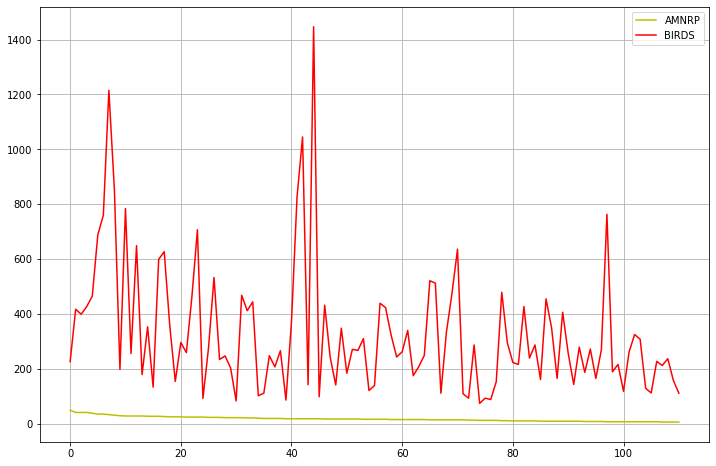

In [42]:
#전체적인 그래프 양상을 확인한다
emd_list = []
for x in df.index :
    emd_list.append(x)
emd_dict = dict(zip(range(len(emd_list)),emd_list))
df['emd_num'] = range(len(emd_list))
df

plt.figure(figsize=(12,8))
plt.plot(df['emd_num'], df['EMD_NM1'], label='AMNRP', color='y')
plt.plot(df['emd_num'], df['EMD_NM3'], label = 'BIRDS', color = 'r')
plt.grid()
plt.legend()
plt.show()
#갯수 그대로 표현을 하니 보기가 매우 어렵다.

In [43]:
#sigmoid 함수를 이용하여 각각의 step function을 자연상수 e를 사용하여 0~1사이의 완만한 그라데이션을 그리는 값으로 치환한다.
def sig_col(col1) :
    temp_list = []
    for x in col1 :
        x = x / np.max(col1)
        y = 1 / (1 + np.exp(-x))
        temp_list.append(y)
    return temp_list

In [44]:
#앞서 생성한 사용자 함수를 기반으로 각각의 양서파충류, 곤충의 step function 계단값을 교정한다
df['sig_amnrp'] = sig_col(df['EMD_NM1'])
#df['sig_bird'] = sig_col(df['EMD_NM2'])
df['sig_insect'] = sig_col(df['EMD_NM3'])

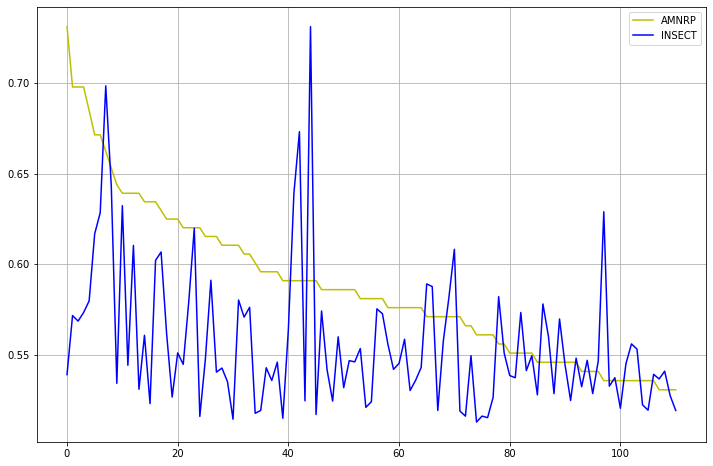

'\n지역 상에서 종 군집이 많을 경우 종 풍부도가 높다.\n그래프를 따르면 첫부분에서는 2차 소비자의 종 군집수가 풍부하며, 1차 소비자의 종 군집수는 낮은편.\n2차 소비자에 대한 1차 소비자의 비율로 이를 구해야하나?\n    - 1차 소비자의 군집 수가 적은데 2차 소비자의 군집수가 많다? 이건\n    - 1차 많은데 2차는 적다?\n    - 둘이 비슷비슷하다?\n아니면 1차 소비자의 평균에 대한 2차 소비자의 비율?\n아니면 샤논 웨너 지수를 때려넣어볼까.\n'

In [45]:
plt.figure(figsize = (12,8))
plt.plot(df['emd_num'], df['sig_amnrp'],label = 'AMNRP', color = 'y')
#plt.plot(df['emd_num'], df['sig_bird'], label = 'BIRDS', color = 'r')
plt.plot(df['emd_num'], df['sig_insect'], label = 'INSECT', color = 'b')
plt.grid()
plt.legend()
plt.show()

"""
지역 상에서 종 군집이 많을 경우 종 풍부도가 높다.
그래프를 따르면 첫부분에서는 2차 소비자의 종 군집수가 풍부하며, 1차 소비자의 종 군집수는 낮은편.
2차 소비자에 대한 1차 소비자의 비율로 이를 구해야하나?
    - 1차 소비자의 군집 수가 적은데 2차 소비자의 군집수가 많다? 이건
    - 1차 많은데 2차는 적다?
    - 둘이 비슷비슷하다?
아니면 1차 소비자의 평균에 대한 2차 소비자의 비율?
아니면 샤논 웨너 지수를 때려넣어볼까.
"""

In [46]:
"""
양서파충류는 생태계 먹이사슬 측면에서 육상과 수상에 양분 순환의 징검다리 역할을 담당한다.
곤충 등의 무척추동물을 주요 먹이자원으로 이용하고, 상위포식자인 포유류와 조류의 먹이 자원이 된다.[7분과:침엽수림과 활엽수림에 서식하는 양서류와 파충류 개체군 특성 - 박창득 외.]
본 연구에서는 해당 지역에 서식하는 파충류의 군집 수, 대상의 먹이자원이 되는 곤충의 군집수 간의 다양한 비교를 통하여 지역의 생태건강도를 추정하고자 한다.
"""
#곤충의 군집 비를 양서파충류의 군집 비로 나누어 양서 파충류의 먹이 상태가 양호한지를 가늠
#Insect Standard Ratio를 구해보기

#1차 소비자인 곤충 군집비와 각 양서파충류와 조류의 군집비의 비를 각각 연산. 생성된 Insect Ratio의 평균 역시 구해준다
df['in_am'] = df['sig_insect'] / df['sig_amnrp']
#df['in_bi'] = df['sig_insect'] / df['sig_bird']
#df['in_mean'] = (df['in_am']+df['in_bi']) / 2
df.head(5)

,EMD_NM1,EMD_NM3,emd_num,sig_amnrp,sig_insect,in_am
index,,,,,,
46780253,49,226,0,0.731059,0.538967,0.737242
43740250,41,417,1,0.697777,0.571551,0.819103
46770350,41,399,2,0.697777,0.568502,0.814733
46780380,41,427,3,0.697777,0.573243,0.821527
46770440,38,465,4,0.684712,0.579654,0.846567


In [47]:
"""
df['in_mean'] = (df['in_am']+df['in_bi']) / 2
df.head(5)
"""

"\ndf['in_mean'] = (df['in_am']+df['in_bi']) / 2\ndf.head(5)\n"

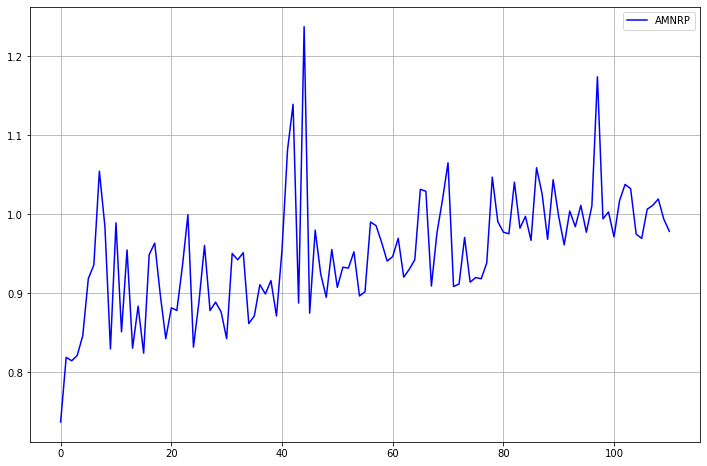

In [48]:
#해당 그래프를 보면 양서파충류에 대한 조사값이 적어 추세값이 점점 커지는 경향을 보이는데
#이를 보정하기 위해 평탄화를 실시하여야 함을 알 수 있다
plt.figure(figsize = (12,8))
plt.plot(df['emd_num'], df['in_am'],label = 'AMNRP', color = 'b')
#plt.plot(df['emd_num'], df['in_bi'], label = 'BIRDS', color = 'g')
#plt.plot(df['emd_num'], df['in_mean'], label = 'INSECT', color = 'y')
plt.grid()
plt.legend()
plt.show()

In [49]:
"""
#곤충 대비 조류의 군집 수 비
plt.figure(figsize = (12,8))
#plt.plot(df['emd_num'], df['in_am'],label = 'AMNRP', color = 'b')
plt.plot(df['emd_num'], df['in_bi'], label = 'BIRDS', color = 'g')
#plt.plot(df['emd_num'], df['in_mean'], label = 'INSECT', color = 'y')
plt.grid()
plt.legend()
plt.show()
"""

"\n#곤충 대비 조류의 군집 수 비\nplt.figure(figsize = (12,8))\n#plt.plot(df['emd_num'], df['in_am'],label = 'AMNRP', color = 'b')\nplt.plot(df['emd_num'], df['in_bi'], label = 'BIRDS', color = 'g')\n#plt.plot(df['emd_num'], df['in_mean'], label = 'INSECT', color = 'y')\nplt.grid()\nplt.legend()\nplt.show()\n"

In [50]:
"""
#곤충 대비 양서파충류와 조류의 평균값 비 그래프
plt.figure(figsize = (12,8))
#plt.plot(df['emd_num'], df['in_am'],label = 'AMNRP', color = 'b')
#plt.plot(df['emd_num'], df['in_bi'], label = 'BIRDS', color = 'g')
plt.plot(df['emd_num'], df['in_mean'], label = 'MEAN', color = 'y')
plt.grid()
plt.legend()
plt.show()
"""

"\n#곤충 대비 양서파충류와 조류의 평균값 비 그래프\nplt.figure(figsize = (12,8))\n#plt.plot(df['emd_num'], df['in_am'],label = 'AMNRP', color = 'b')\n#plt.plot(df['emd_num'], df['in_bi'], label = 'BIRDS', color = 'g')\nplt.plot(df['emd_num'], df['in_mean'], label = 'MEAN', color = 'y')\nplt.grid()\nplt.legend()\nplt.show()\n"

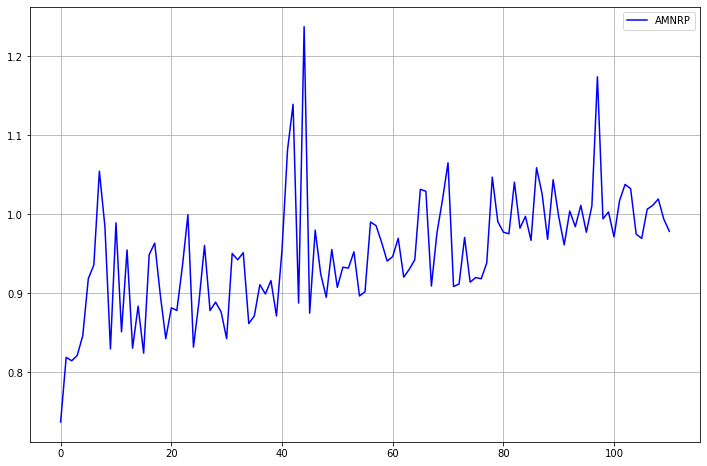

In [52]:
#하나로!
plt.figure(figsize = (12,8))
plt.plot(df['emd_num'], df['in_am'],label = 'AMNRP', color = 'b')
#plt.plot(df['emd_num'], df['in_bi'], label = 'BIRDS', color = 'g')
#plt.plot(df['emd_num'], df['in_mean'], label = 'MEAN', color = 'y')
plt.grid()
plt.legend()
plt.show()

In [53]:
#추세선의 기울기와 절편을 담을 리스트 생성.
temptemp = []

In [54]:
#최소제곱법을 이용하여 추세선을 만들기 위해 poly1d 넘파이 함수로 polynomial class를 만들어 주었고, 이를 가시화하는 함수 생성
def polyfitting(x, y) :
    x1 = x
    y1 = y
    a1 = np.polyfit(x1, y1, 1) #추세선을 그리기 위해 차원 정의
    b1 = np.poly1d(a1) #1차원 다항식에 대한 연산 캡슐화
    plt.figure(figsize=(12,8))
    plt.plot(x1, y1, label='INSECT : AMNRP', color='y')
    plt.plot(x1, b1(x1), lw=2, color='r', label='POLYFIT')
    plt.grid()
    plt.legend()
    plt.show()
    temptemp.append(list(b1))
    return temptemp

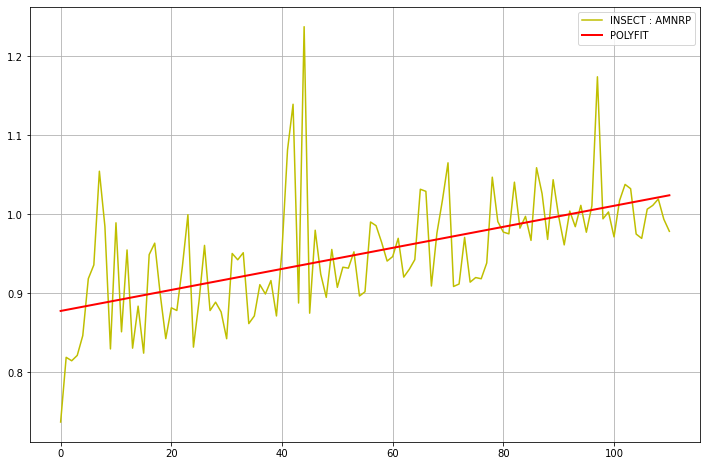

[[0.0013302673408137553, 0.8777605520554845]]

In [55]:
polyfitting(df['emd_num'], df['in_am'])

In [57]:
#polyfitting(df['emd_num'], df['in_bi'])

In [56]:
#polyfitting(df['emd_num'], df['in_mean'])

In [58]:
#다음으로 부터 구해진 기울기와 절편으로 추세선 값에 대한 컬럼을 추가한다 이후 평탄화 작업을 시작한다.
#temptemp[2][1]

IndexError: list index out of range

In [59]:
df.head(5)

,EMD_NM1,EMD_NM3,emd_num,sig_amnrp,sig_insect,in_am
index,,,,,,
46780253,49,226,0,0.731059,0.538967,0.737242
43740250,41,417,1,0.697777,0.571551,0.819103
46770350,41,399,2,0.697777,0.568502,0.814733
46780380,41,427,3,0.697777,0.573243,0.821527
46770440,38,465,4,0.684712,0.579654,0.846567


In [60]:
#추세선의 값을 설정하고, 이 값을 기준으로 평탄화를 진행한다.

df['in_am_pf'] = temptemp[0][0]*df['emd_num']+temptemp[0][1]
df['ISR_am'] = df['in_am'] - df['in_am_pf']

#df['in_bi_pf'] = temptemp[1][0]*df['emd_num']+temptemp[1][1]
#df['ISR_bi'] = df['in_bi'] - df['in_bi_pf']

#df['in_mean_pf'] = temptemp[2][0]*df['emd_num']+temptemp[2][1]
#df['ISR_mean'] = df['in_mean'] - df['in_mean_pf']

df.head(5)

,EMD_NM1,EMD_NM3,emd_num,sig_amnrp,sig_insect,in_am,in_am_pf,ISR_am
index,,,,,,,,
46780253,49,226,0,0.731059,0.538967,0.737242,0.877761,-0.140519
43740250,41,417,1,0.697777,0.571551,0.819103,0.879091,-0.059988
46770350,41,399,2,0.697777,0.568502,0.814733,0.880421,-0.065688
46780380,41,427,3,0.697777,0.573243,0.821527,0.881751,-0.060224
46770440,38,465,4,0.684712,0.579654,0.846567,0.883082,-0.036515


In [61]:
def one_graph(x12,colorselect) :
    zero = []
    for abcabc in range(len(df['emd_num'])) :
        zero.append(0)
    plt.figure(figsize=(12,8))
    plt.plot(df['emd_num'], x12, label= 'ISR', color=colorselect)
    plt.plot(df['emd_num'], zero, lw=2, color='r', label='ZeroPoint')
    plt.grid()
    plt.legend()
    plt.show()

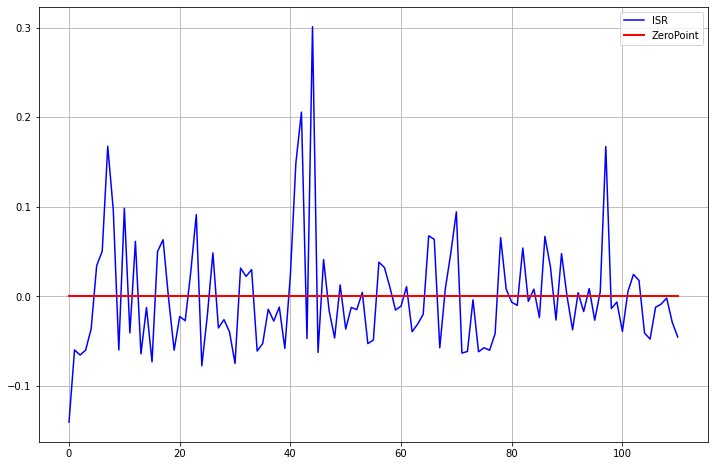

In [62]:
one_graph(df['ISR_am'],'b')

In [ ]:
#one_graph(df['ISR_bi'],'g')

In [ ]:
#one_graph(df['ISR_mean'],'y')

# IDA 상태지수 활용법
- 전제조건
 - 기 사용된 데이터는 관찰자가 해당지역에서 관찰한 종 군집 수에 기반을 두며, 이는 관찰된 곤충의 수, 양서파충류의 수의 빈도에 따라 바뀐다. IDA지수의 높고 낮음은 생태계 복잡도의 좋고 나쁨을 나타내는 지수가 아닌, 1차 or 2차 소비자의 포화, 부족을 나타내는 지표로서, 생태서식종 관리의 지표로 유용되는 용도를 지향한다
 - 이를 위하여 Shannon-wiener 지수와같이 로그를 씌워 정도를 표현하는 것이 아닌 Sigmoid함수를 적용하고 연속체제거 작업을 통해 판단의 지표로 표시하였다
 - 
 - 
 
- 지수가 높을경우(양의 값)
 - 관찰되는 곤충 군집 수에 비해 양서파충류 군집 수가 적음
 - 생태서식종 중 곤충을 먹이로 하는 2차 소비자의 서식이 충분히 가능하며, 상위 포식자를 포함한 생태계 조성이 가능할 것으로 보임
 - 
 - 
- 지수가 0에 수렴할 경우(0)
 - 관찰되는 1차 소비자와 2차 소비자의 균형이 이룬 지역
 - 생태관리 관심이 각별하게 유의되지 않음
 - 
 - 
- 지수가 낮을경우(음의 값)
 - 관찰되는 양서파충류 군집 수에 비해 곤충 군집 수가 적음
 - 차상위 포식자의 포화가 우려되는 지역으로 생태관리가 필요한 지역

In [63]:
import base64
from IPython.display import HTML

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [64]:
create_download_link(df)

In [ ]:
abcc = df['ISR_am']-sorted(df['ISR_am'])[0]
df['ISR_am'] = abcc
abcc = df['ISR_bi']-sorted(df['ISR_bi'])[0]
df['ISR_bi'] = abcc
abcc = df['ISR_mean']-sorted(df['ISR_mean'])[0]
df['ISR_mean'] = abcc

In [ ]:
df

In [65]:
df.to_excel('Result_am.xlsx')

In [ ]:
df.head(5)

# 고찰파트

# in_div_am 을 통하여 다양성의 지수를 구하는 수식중 하나인 Shannon-wiener 지수에 대입시켜 종 다양성을 지수화해본다.
- 원래는 필요한 P는 각 종의 개체수 / 총 개체수 를 이용하지만, 개체 수에 대한 데이터는 없으며 각 지역별로 각 종에 대한 군집 수는 대부분 1이며, 적게나마 2로 표기되어 있기에
- (1 or 2) / 해당 지역의 군집수 로 인자를 지정할 경우 신뢰성이 떨어져 P를 곤충 군집비 / 양서파충류 군집비 로 지정하여
- 생태계의 중간역할을 하는 양서파충류를 생태계를 대표하는 대표군으로 선정하여 서식환경 적합도를 구하였다.
- P는 높을수록 양서파충류의 군집비에 비해 곤충의 군집비가 높은것을 의미한다. 